In [1]:
### IMPORT: ------------------------------------
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
# sns.set(style="darkgrid") # set the background for the graphs
# from scipy.stats import skew

In [2]:
#Reading the csv file salary Data.csv
df = pd.read_csv(r"insurance.csv")
Data=df.copy()
Data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
Data['sex'] = Data['sex'].astype("category")
Data['smoker'] = Data['smoker'].astype("category")
Data['region'] = Data['region'].astype("category")
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   expenses  1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [5]:
Data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
Data01 = Data[['bmi','children','expenses']]
Data01.corr()

,bmi,children,expenses
bmi,1.000000,0.012645,0.198576
children,0.012645,1.000000,0.067998
expenses,0.198576,0.067998,1.000000


In [7]:
Data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


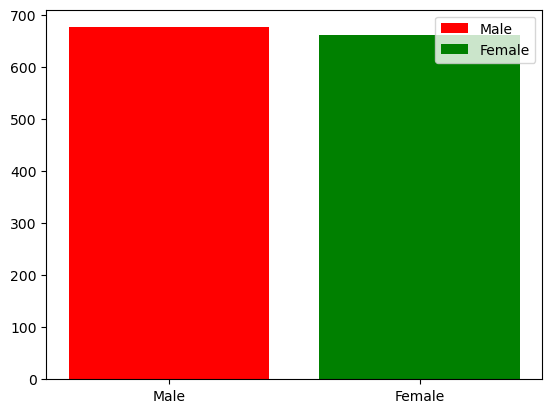

In [8]:
#Univariate_Analysis

no_of_male = len(Data[Data['sex'] == 'male'])
no_of_female = len(Data[Data['sex'] == 'female'])

plt.bar(['Male','Female'],[no_of_male,no_of_female],color = ['r','g'],label = ['Male','Female'])
plt.legend()
plt.show()

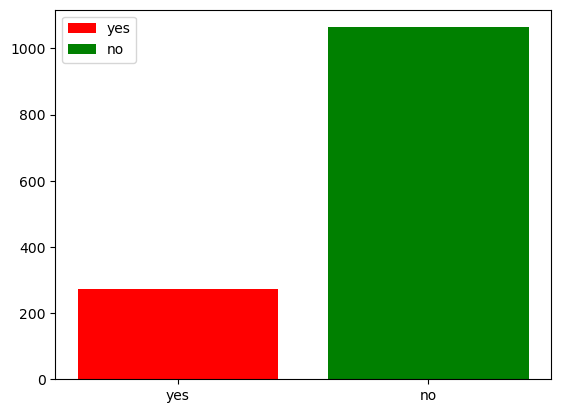

In [12]:
x = len(Data[Data['smoker'] == 'yes'])
y = len(Data[Data['smoker'] == 'no'])

plt.bar(['yes','no'],[x,y],color = ['r','g'],label = ['yes','no'])
plt.legend()
plt.show()

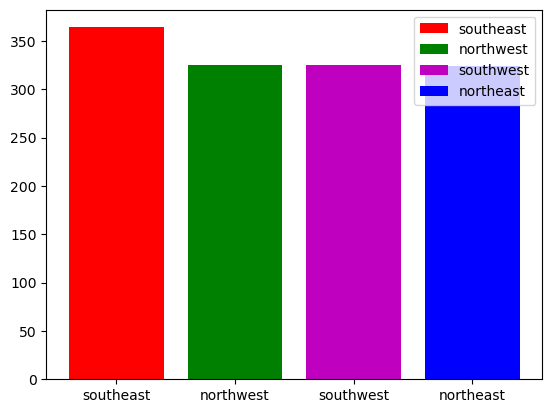

In [13]:
p = len(Data[Data['region'] == 'southeast'])
q = len(Data[Data['region'] == 'northwest'])
r = len(Data[Data['region'] == 'southwest'])
s = len(Data[Data['region'] == 'northeast'])

plt.bar(['southeast','northwest','southwest','northeast'],[p,q,r,s],color = ['r','g','m','b'],label = ['southeast','northwest','southwest','northeast'])
plt.legend()
plt.show()

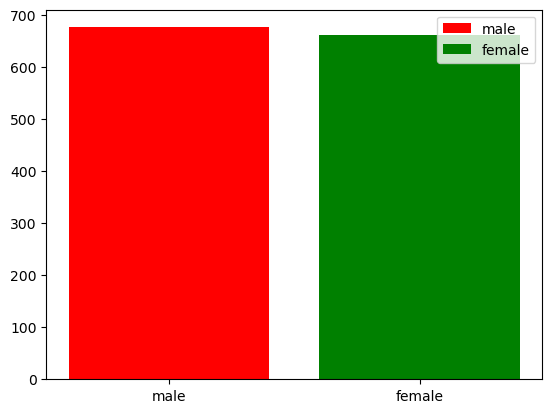

In [14]:
plot = dict(Data['sex'].value_counts())

plt.bar(['male','female'],[plot['male'],plot['female']],color = ['r','g'],label = ['male','female'])
plt.legend()
plt.show()

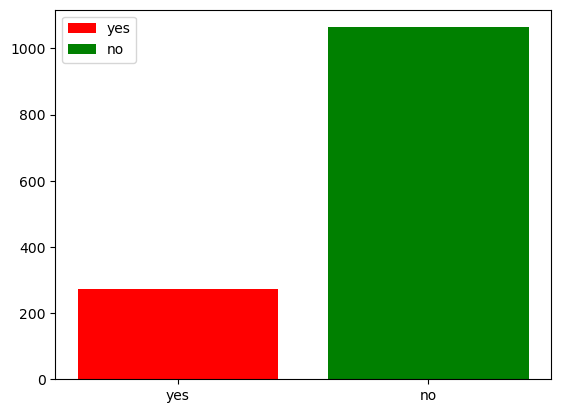

In [15]:
plot = dict(Data['smoker'].value_counts())

plt.bar(['yes','no'],[plot['yes'],plot['no']],color = ['r','g'],label = ['yes','no'])
plt.legend()
plt.show()

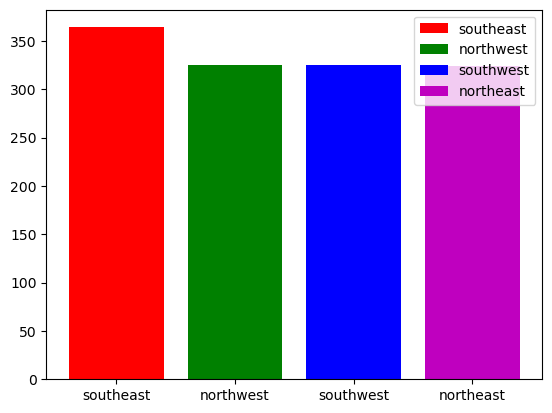

In [16]:
plot = dict(Data['region'].value_counts())

plt.bar(['southeast','northwest','southwest','northeast'],[plot['southeast'],plot['northwest'],plot['southwest'],plot['northeast']],color = ['r','g','b','m'],label = ['southeast','northwest','southwest','northeast'])
plt.legend()
plt.show()

{'male': 676, 'female': 662}


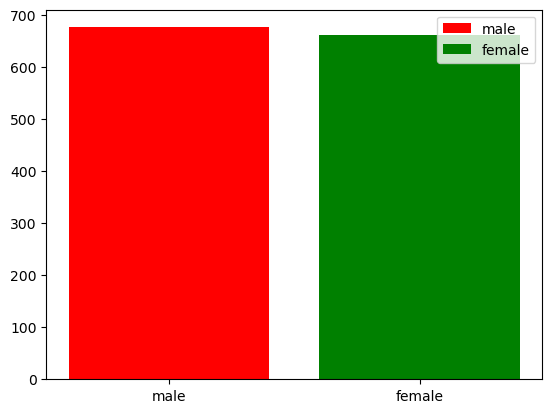

In [17]:
x = dict(Data['sex'].value_counts())
print(x)
plt.bar(x.keys(),x.values(),color = ['r','g'],label = x.keys())
plt.legend()
plt.show()

{'no': 1064, 'yes': 274}


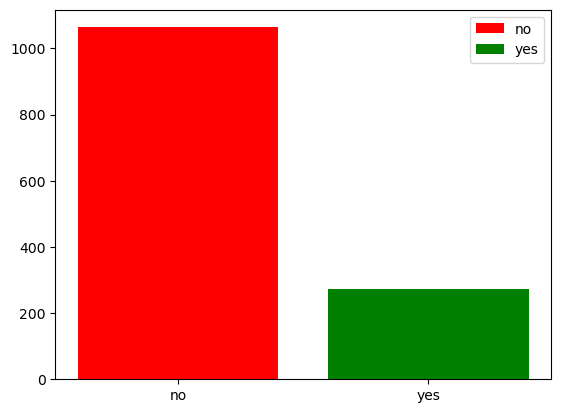

In [16]:
y = dict(Data['smoker'].value_counts())
print(y)
plt.bar(y.keys(),y.values(),color = ['r','g'],label = y.keys())
plt.legend()
plt.show()

{'southeast': 364, 'northwest': 325, 'southwest': 325, 'northeast': 324}


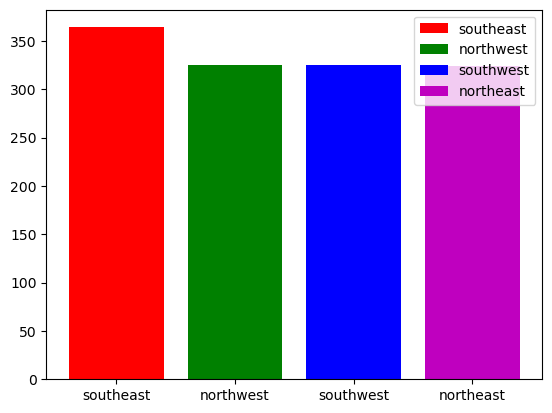

In [17]:
z = dict(Data['region'].value_counts())
print(z)
plt.bar(z.keys(),z.values(),color = ['r','g','b','m'],label = z.keys())
plt.legend()
plt.show()

<Axes: xlabel='sex'>

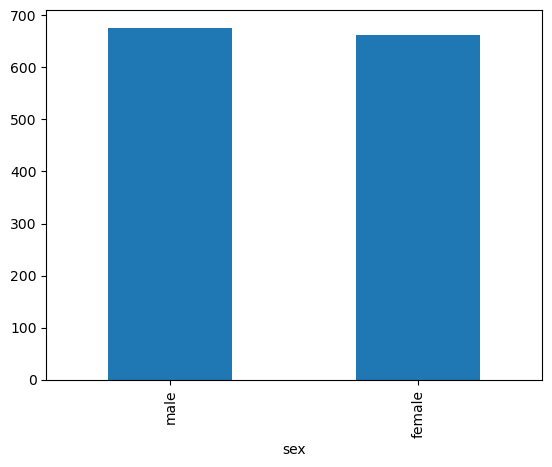

In [18]:
Data['sex'].value_counts().plot.bar()

<Axes: xlabel='smoker'>

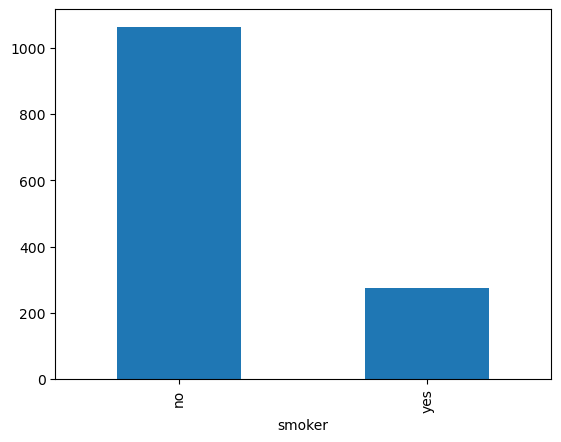

In [21]:
Data['smoker'].value_counts().plot.bar()

region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64


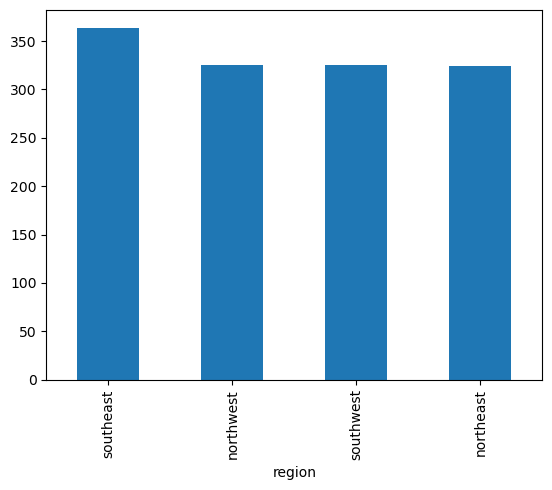

In [19]:
Data['region'].value_counts().plot.bar()
print(Data['region'].value_counts())

In [21]:
data = {}
list_col=  Data.select_dtypes(['category']).columns
for i in range(len(list_col)):
  values = list(Data[list_col[i]].value_counts())
  subcategory = list(Data[list_col[i]].value_counts().index)
  # data['x'] = values
  data[list_col[i]] = [subcategory,values]
  # print(subcategory,values)

print(data)

{'sex': [['male', 'female'], [676, 662]], 'smoker': [['no', 'yes'], [1064, 274]], 'region': [['southeast', 'northwest', 'southwest', 'northeast'], [364, 325, 325, 324]]}


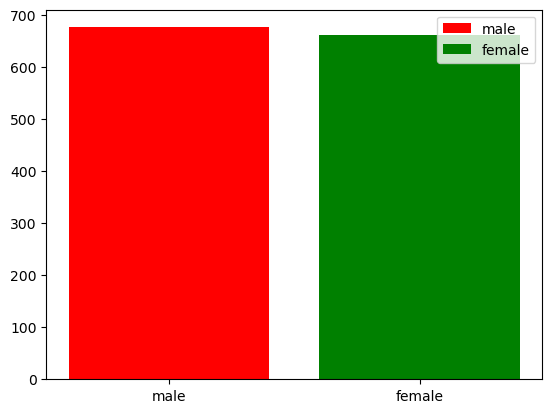

In [22]:
plt.bar(data['sex'][0],data['sex'][1],color = ['r','g'],label = data['sex'][0])
plt.legend()
plt.show()

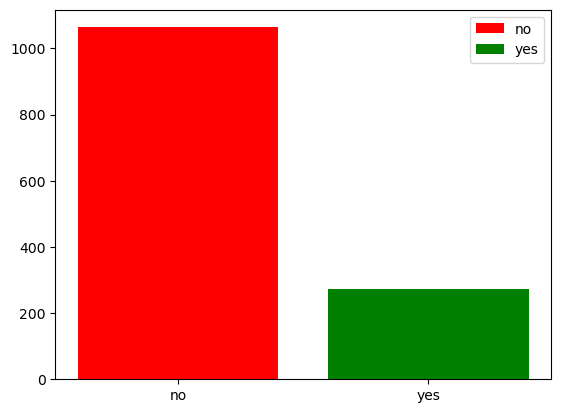

In [23]:
plt.bar(data['smoker'][0],data['smoker'][1],color = ['r','g'],label = data['smoker'][0])
plt.legend()
plt.show()

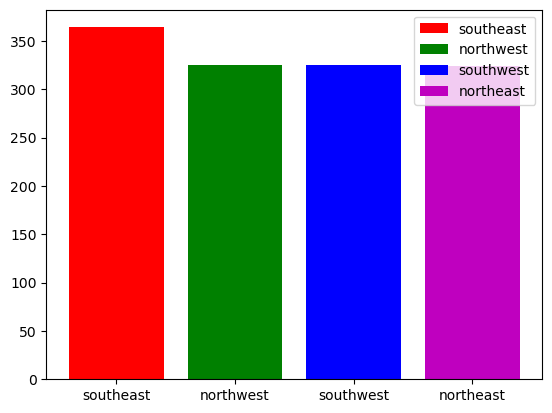

In [24]:
plt.bar(data['region'][0],data['region'][1],color = ['r','g','b','m'],label = data['region'][0])
plt.legend()
plt.show()

In [25]:
Data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [26]:
Data_1 = Data[['age','bmi','children','expenses']]
Data_1

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86
...,...,...,...,...
1333,50,31.0,3,10600.55
1334,18,31.9,0,2205.98
1335,18,36.9,0,1629.83
1336,21,25.8,0,2007.95


In [27]:
Data_1.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


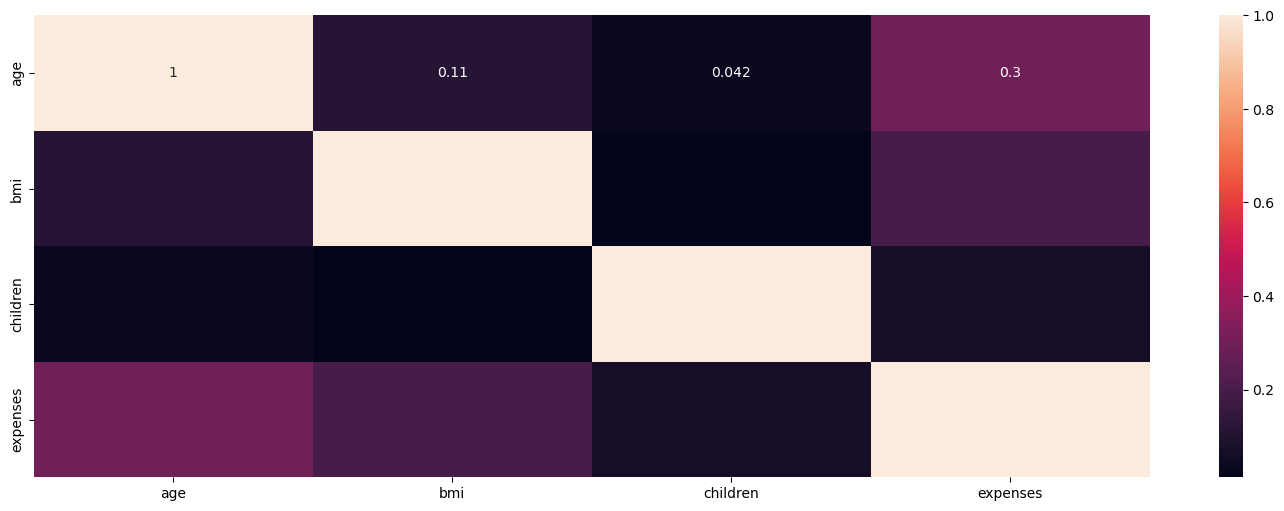

In [28]:
plt.figure(figsize=(18,6))
sns.heatmap(Data_1.corr(),annot = True)
plt.show()

<Figure size 1800x600 with 0 Axes>

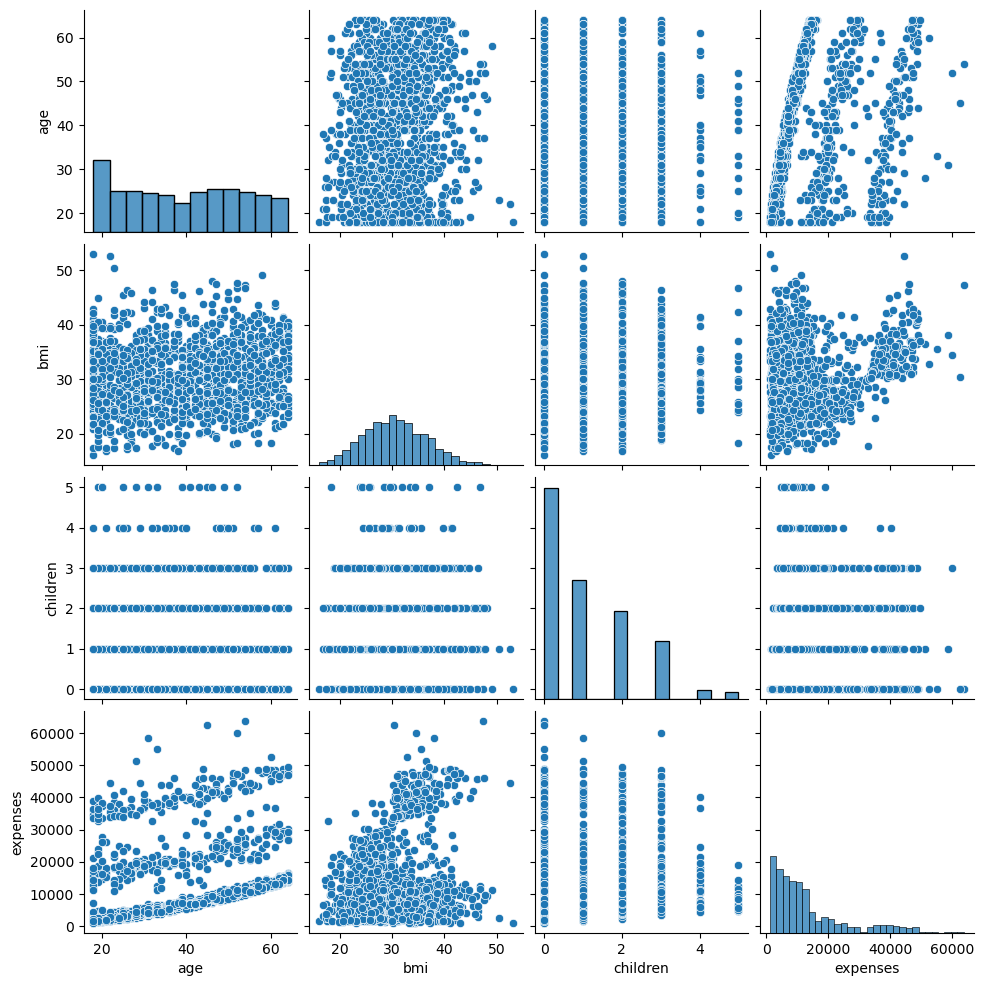

In [29]:
plt.figure(figsize=(18,6))
sns.pairplot(data = Data_1)
plt.show()

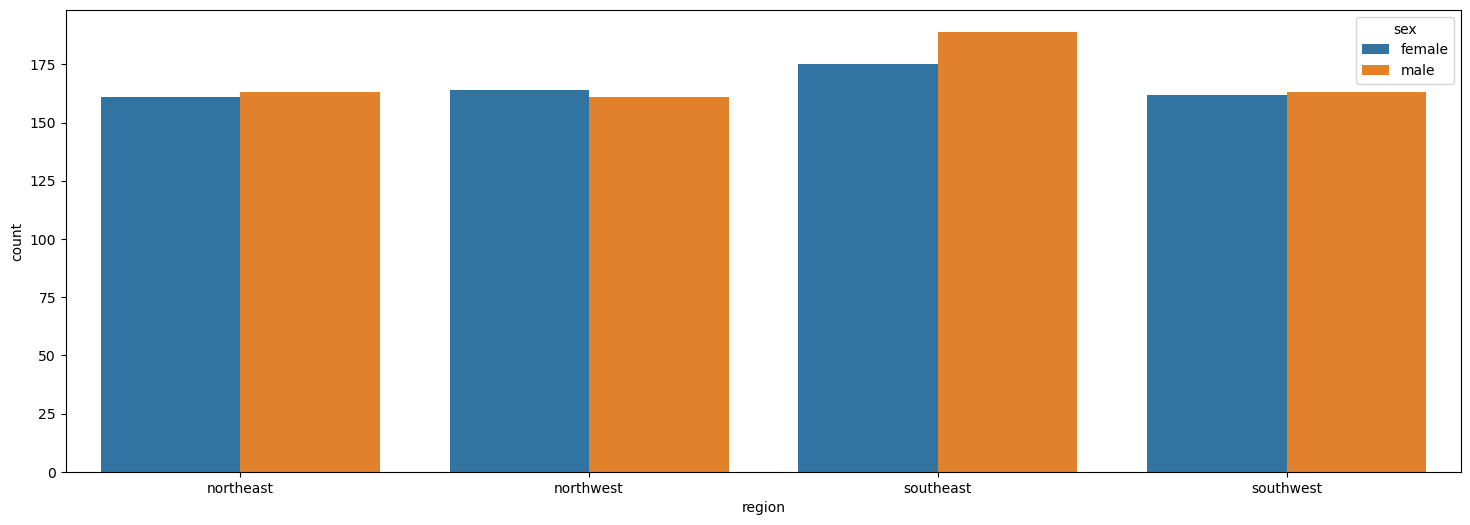

In [30]:
plt.figure(figsize=(18,6))
ax=sns.countplot(x='region',hue='sex',data=Data)

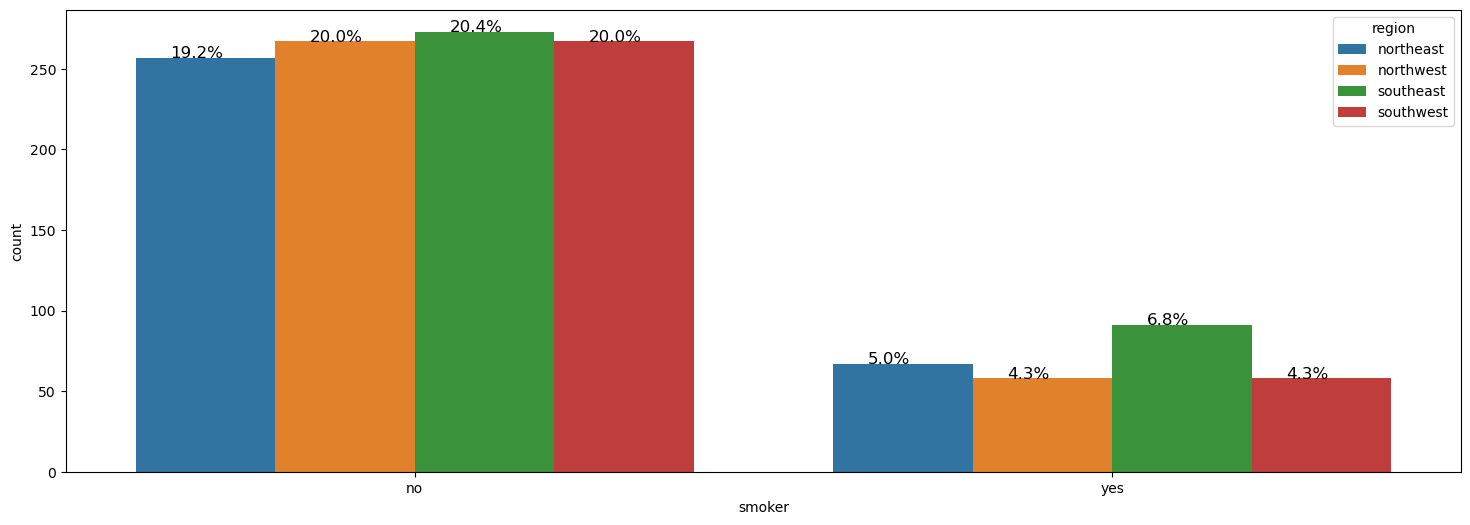

In [31]:
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage


plt.figure(figsize=(18,6))
ax=sns.countplot(x='smoker',hue='region',data=Data)
bar_perc(ax,Data['smoker'])

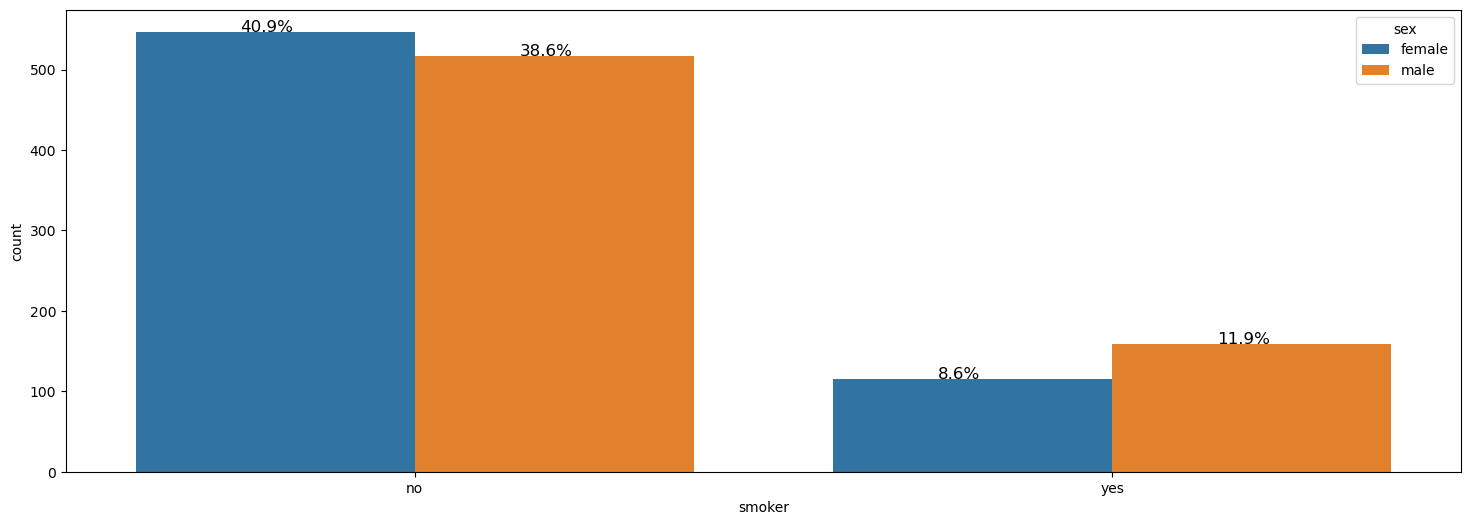

In [32]:
plt.figure(figsize=(18,6))
ax=sns.countplot(x='smoker',hue='sex',data=Data)
bar_perc(ax,Data['smoker'])

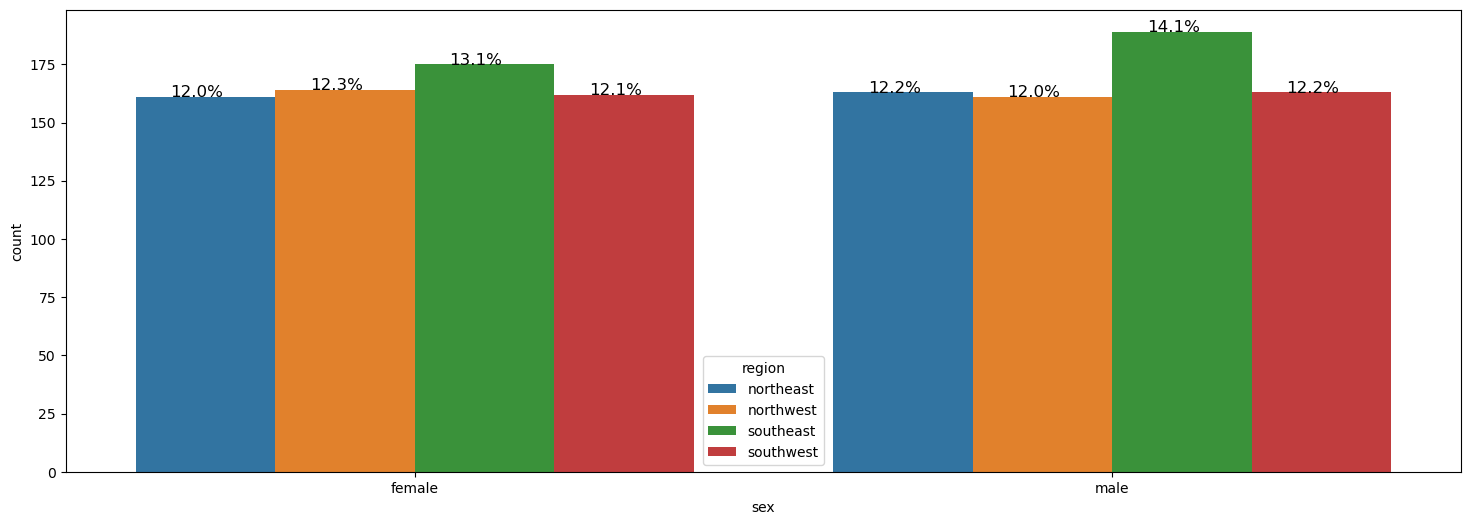

In [33]:
plt.figure(figsize=(18,6))
ax=sns.countplot(x='sex',hue='region',data=Data)
bar_perc(ax,Data['sex'])

<Figure size 1800x600 with 0 Axes>

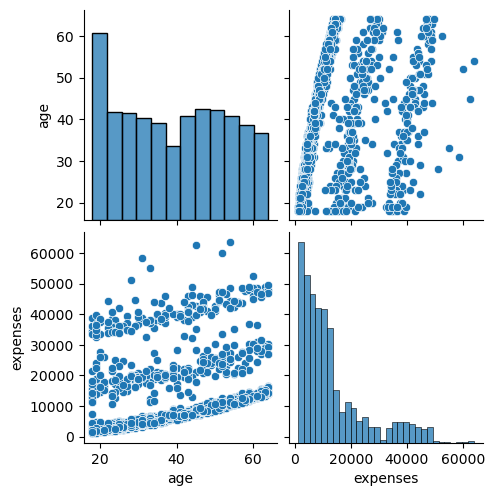

In [34]:
Data_2 = Data[['age','expenses']]
plt.figure(figsize=(18,6))
sns.pairplot(data = Data_2)
plt.show()

<Axes: xlabel='region'>

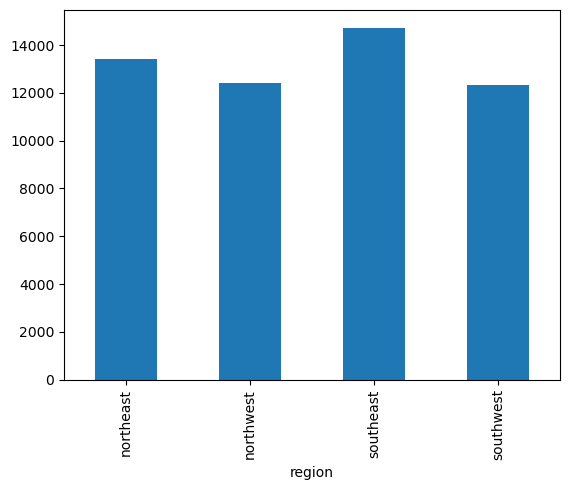

In [35]:
Data.groupby(Data['region']).expenses.mean().plot.bar()
             

<Axes: xlabel='sex'>

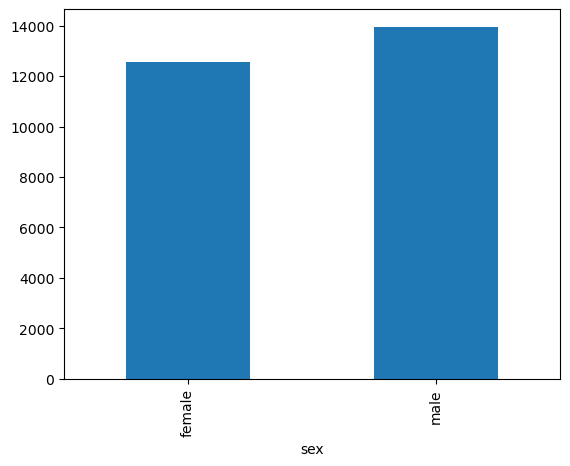

In [36]:
Data.groupby(Data['sex']).expenses.mean().plot.bar()

<Axes: xlabel='smoker'>

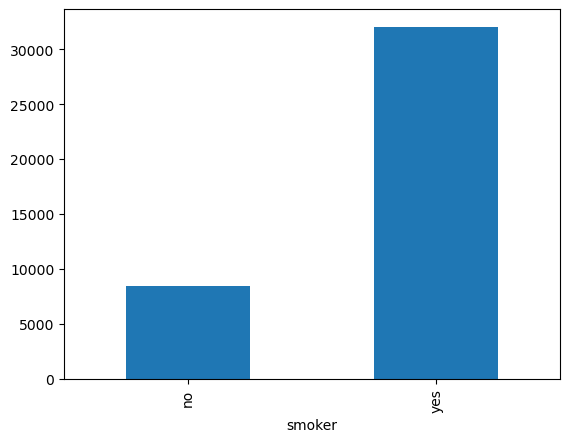

In [37]:
Data.groupby(Data['smoker']).expenses.mean().plot.bar()

In [38]:
Data.groupby(Data['smoker']).bmi.mean()

smoker
no     30.653195
yes    30.713139
Name: bmi, dtype: float64

<Axes: xlabel='smoker'>

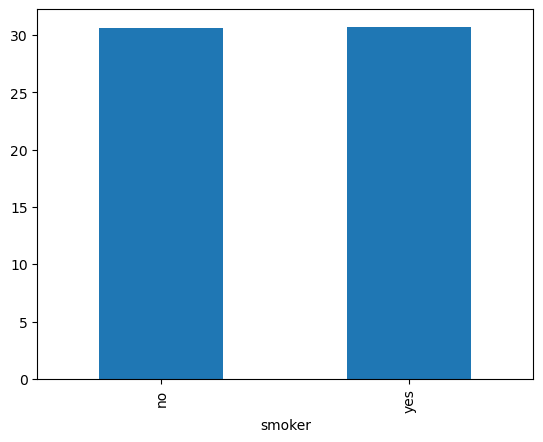

In [39]:
Data.groupby(Data['smoker']).bmi.mean().plot.bar()

In [40]:
Data.groupby(Data['sex']).bmi.mean()

sex
female    30.379758
male      30.945266
Name: bmi, dtype: float64

<Axes: xlabel='sex'>

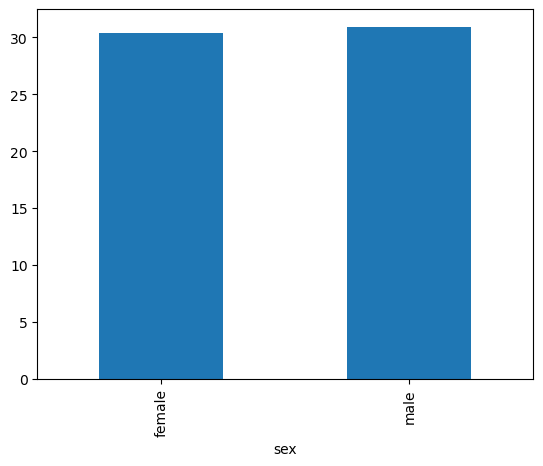

In [41]:
Data.groupby(Data['sex']).bmi.mean().plot.bar()

<Axes: xlabel='region'>

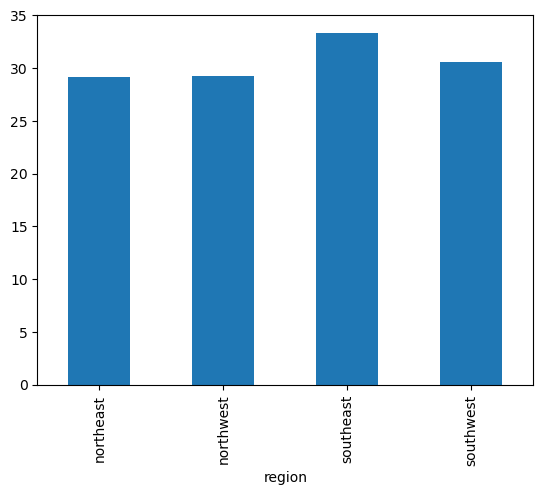

In [42]:
Data.groupby(Data['region']).bmi.mean().plot.bar()

<Axes: xlabel='sex'>

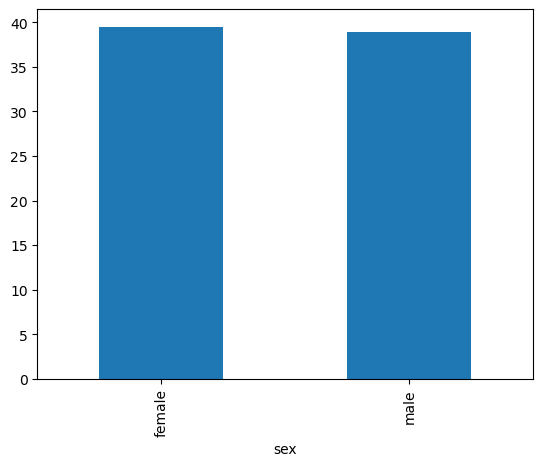

In [43]:
Data.groupby(Data['sex']).age.mean().plot.bar()

<Axes: xlabel='smoker'>

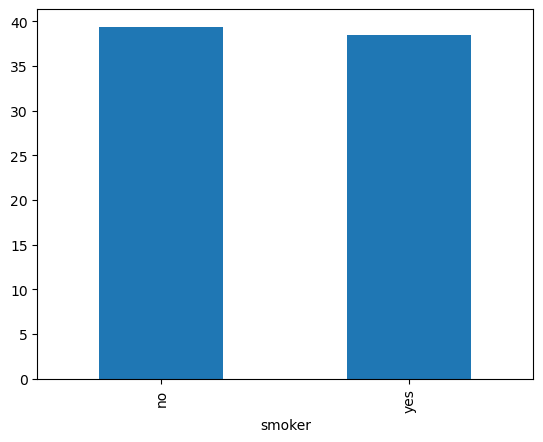

In [44]:
Data.groupby(Data['smoker']).age.mean().plot.bar()

<Axes: xlabel='region'>

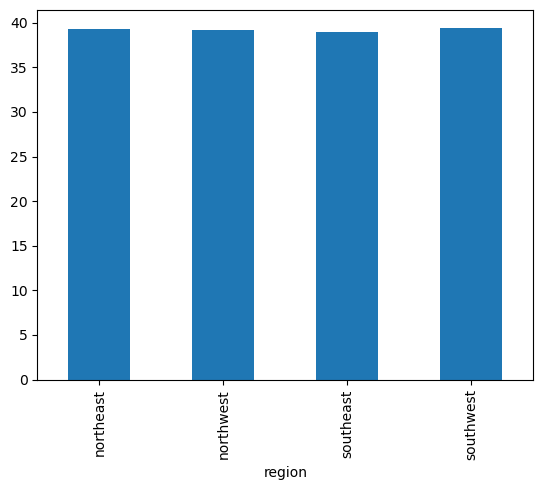

In [45]:
Data.groupby(Data['region']).age.mean().plot.bar()

[Text(0.5, 1.0, 'Gender Vs BMI')]

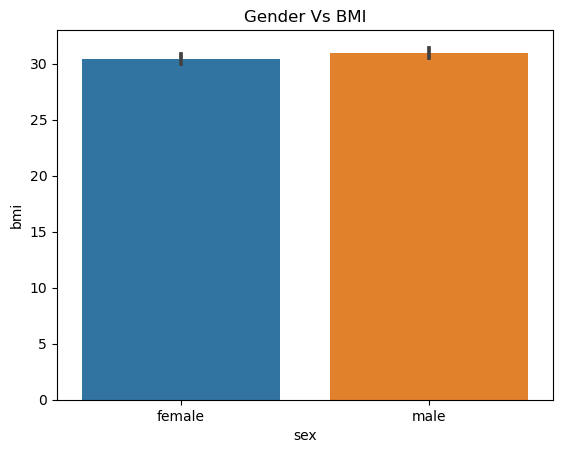

In [46]:
sns.barplot(x=Data.sex,y=Data.bmi).set(title='Gender Vs BMI')

[Text(0.5, 1.0, 'Gender Vs Expenses')]

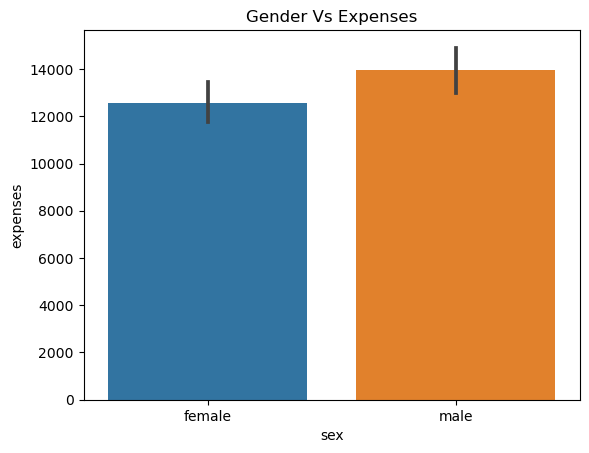

In [47]:
sns.barplot(x=Data.sex,y=Data.expenses).set(title='Gender Vs Expenses')

[Text(0.5, 1.0, 'Gender Vs Children')]

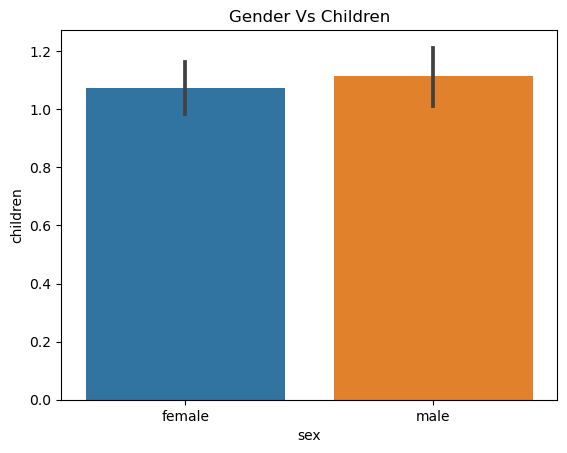

In [48]:
sns.barplot(x=Data.sex,y=Data.children).set(title='Gender Vs Children')

[Text(0.5, 1.0, 'Smoker Vs Bmi')]

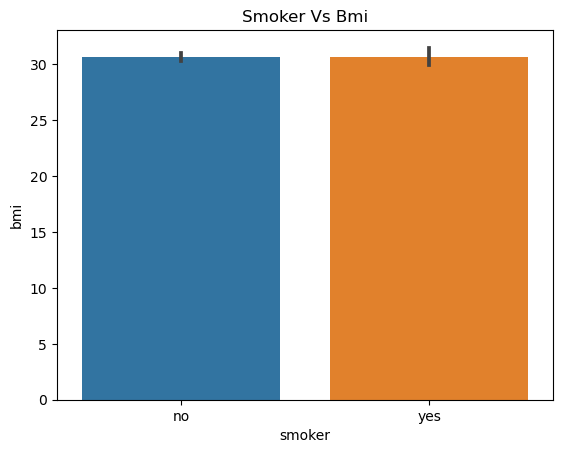

In [49]:
sns.barplot(x=Data.smoker,y=Data.bmi).set(title='Smoker Vs Bmi')

[Text(0.5, 1.0, 'Smoker Vs Expenses')]

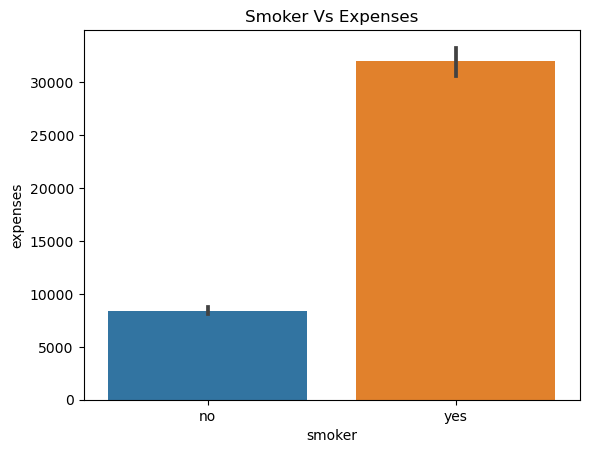

In [50]:
sns.barplot(x=Data.smoker,y=Data.expenses).set(title='Smoker Vs Expenses')

[Text(0.5, 1.0, 'Smoker Vs children')]

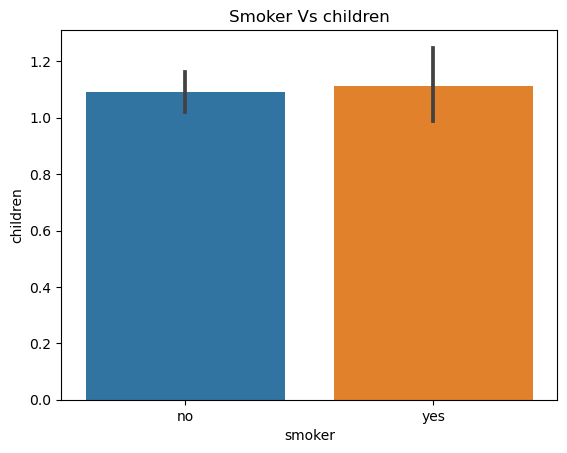

In [51]:
sns.barplot(x=Data.smoker,y=Data.children).set(title='Smoker Vs children')

[Text(0.5, 1.0, 'region Vs Bmi')]

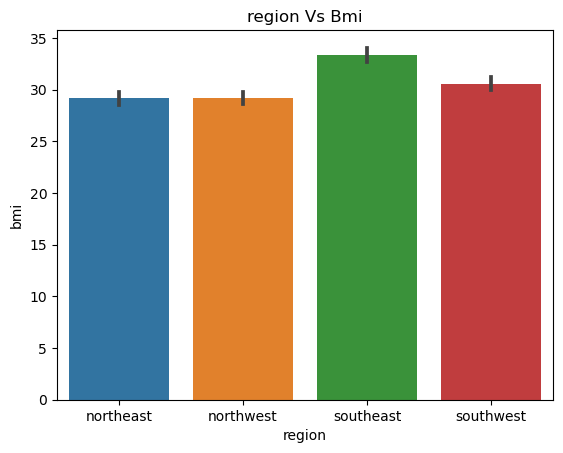

In [52]:
sns.barplot(x=Data.region,y=Data.bmi).set(title='region Vs Bmi')

[Text(0.5, 1.0, 'Region Vs Expenses')]

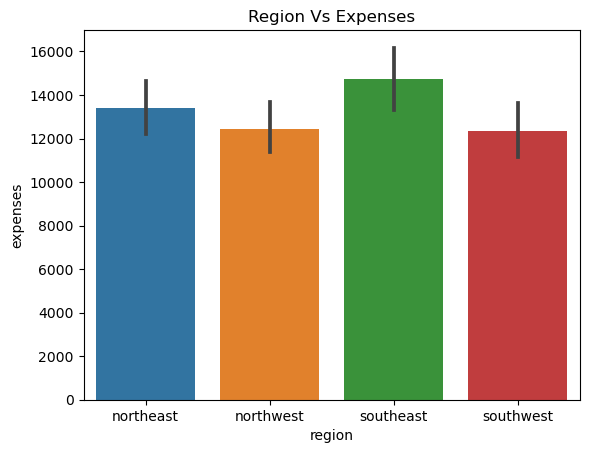

In [53]:
sns.barplot(x=Data.region,y=Data.expenses).set(title='Region Vs Expenses')

[Text(0.5, 1.0, 'Region Vs Children')]

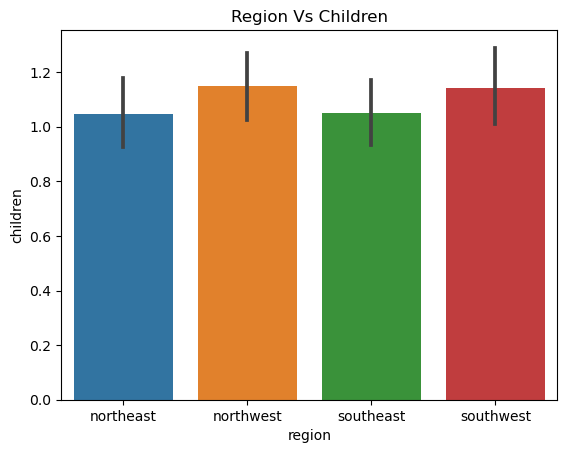

In [55]:
sns.barplot(x=Data.region,y=Data.children).set(title='Region Vs Children')

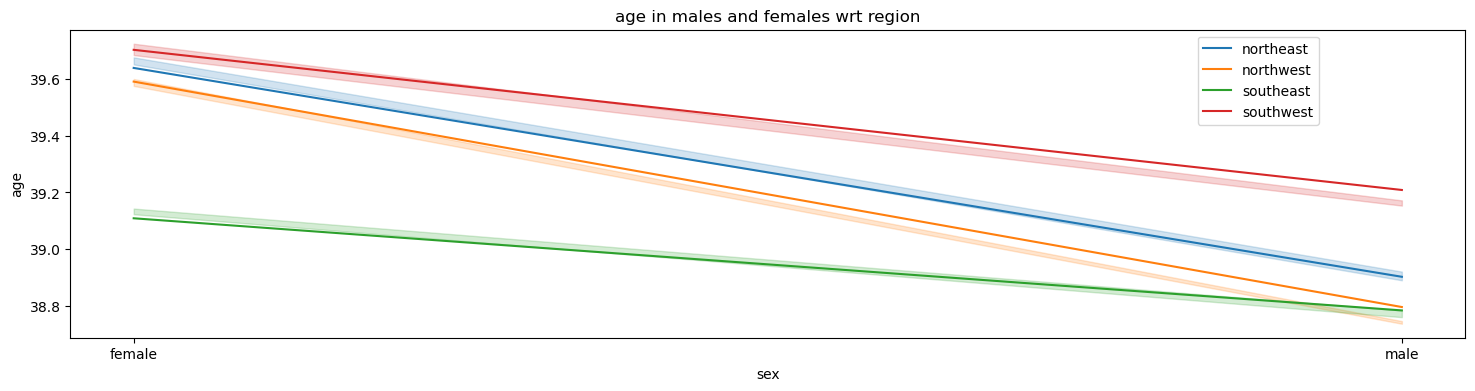

In [58]:
#Multivariate_Analysis

plt.figure(figsize=(18,4))
sns.lineplot(x = Data["sex"], y =Data["age"],hue=Data["region"],ci=1).set(title= 'age in males and females wrt region')
plt.legend(bbox_to_anchor=(0.9, 1))
plt.show()

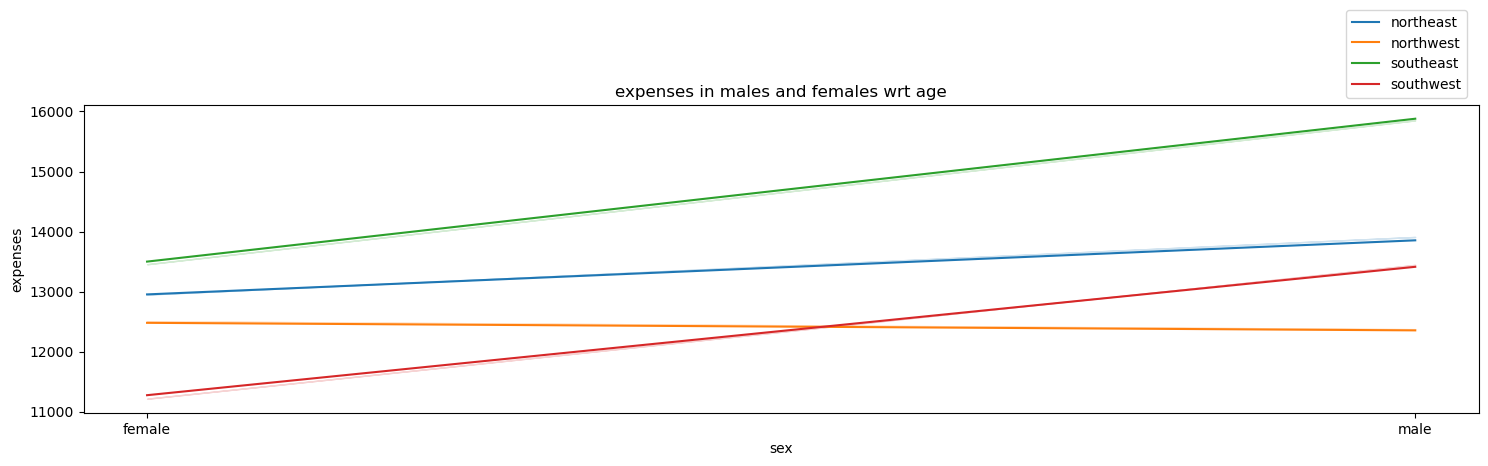

In [73]:
plt.figure(figsize=(18,4))
sns.lineplot(x = Data["sex"], y =Data["expenses"],hue=Data["region"],ci=0.01).set(title= 'expenses in males and females wrt age')
plt.legend(bbox_to_anchor=(0.9, 1))
plt.show()

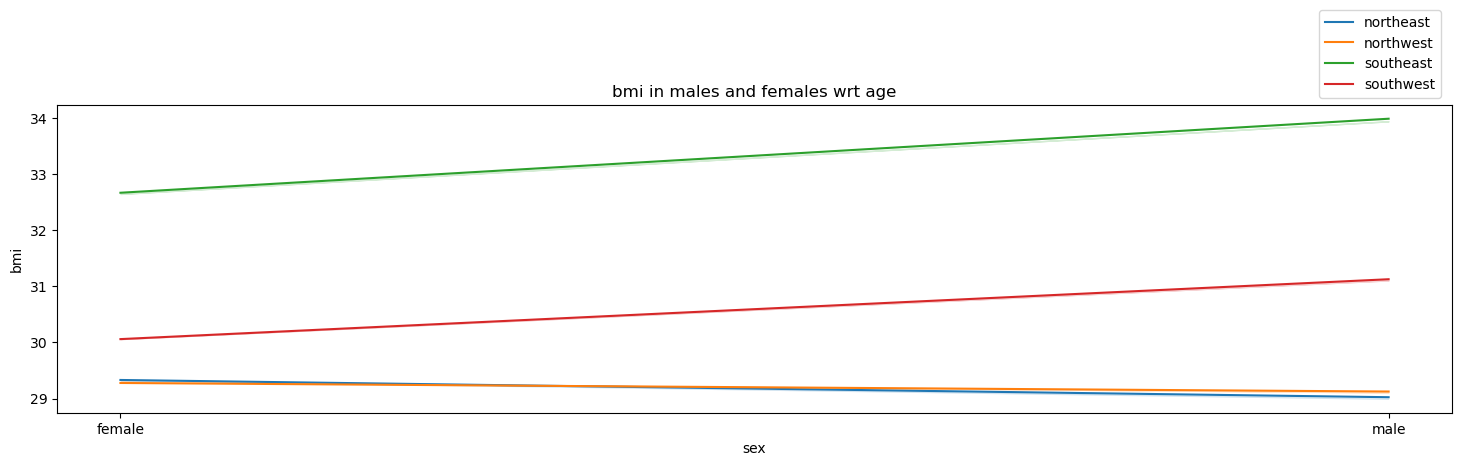

In [77]:
plt.figure(figsize=(18,4))
sns.lineplot(x = Data["sex"], y =Data["bmi"],hue=Data["region"],ci=0.01).set(title= 'bmi in males and females wrt age')
plt.legend(bbox_to_anchor=(0.9, 1))
plt.show()

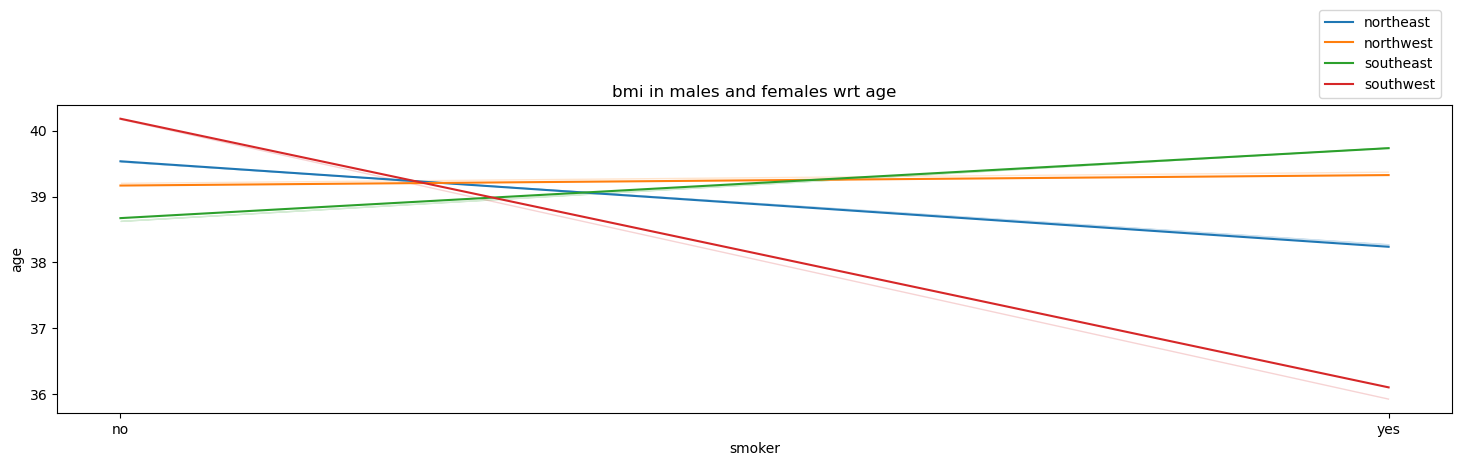

In [59]:
plt.figure(figsize=(18,4))
sns.lineplot(x = Data["smoker"], y =Data["age"],hue=Data["region"],ci=0.01).set(title= 'bmi in males and females wrt age')
plt.legend(bbox_to_anchor=(0.9, 1))
plt.show()

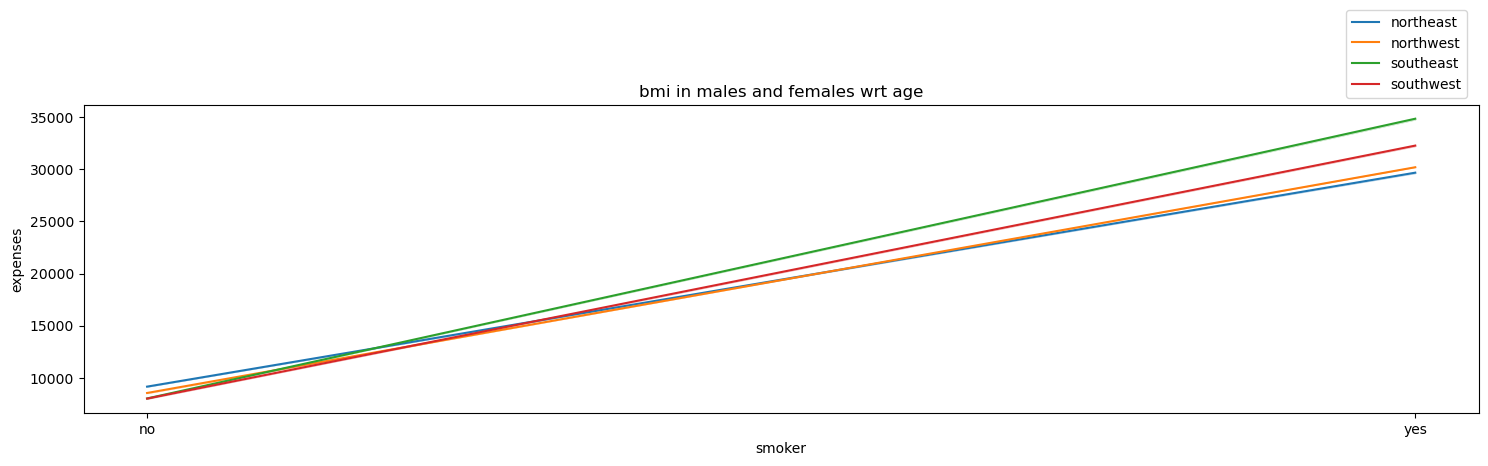

In [60]:
plt.figure(figsize=(18,4))
sns.lineplot(x = Data["smoker"], y =Data["expenses"],hue=Data["region"],ci=0.01).set(title= 'bmi in males and females wrt age')
plt.legend(bbox_to_anchor=(0.9, 1))
plt.show()

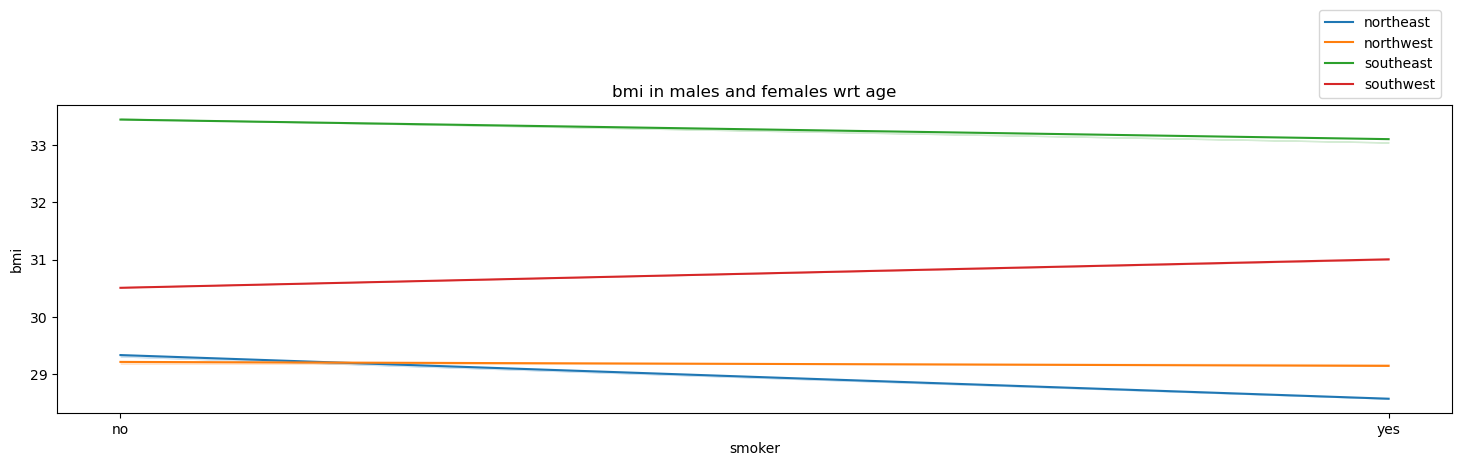

In [61]:
plt.figure(figsize=(18,4))
sns.lineplot(x = Data["smoker"], y =Data["bmi"],hue=Data["region"],ci=0.01).set(title= 'bmi in males and females wrt age')
plt.legend(bbox_to_anchor=(0.9, 1))
plt.show()

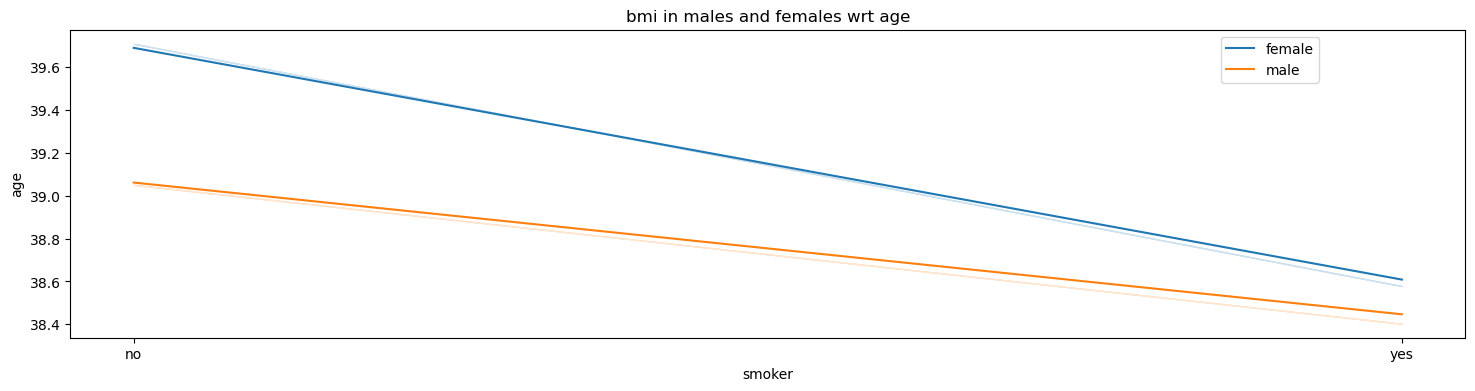

In [62]:
plt.figure(figsize=(18,4))
sns.lineplot(x = Data["smoker"], y =Data["age"],hue=Data["sex"],ci=0.01).set(title= 'bmi in males and females wrt age')
plt.legend(bbox_to_anchor=(0.9, 1))
plt.show()

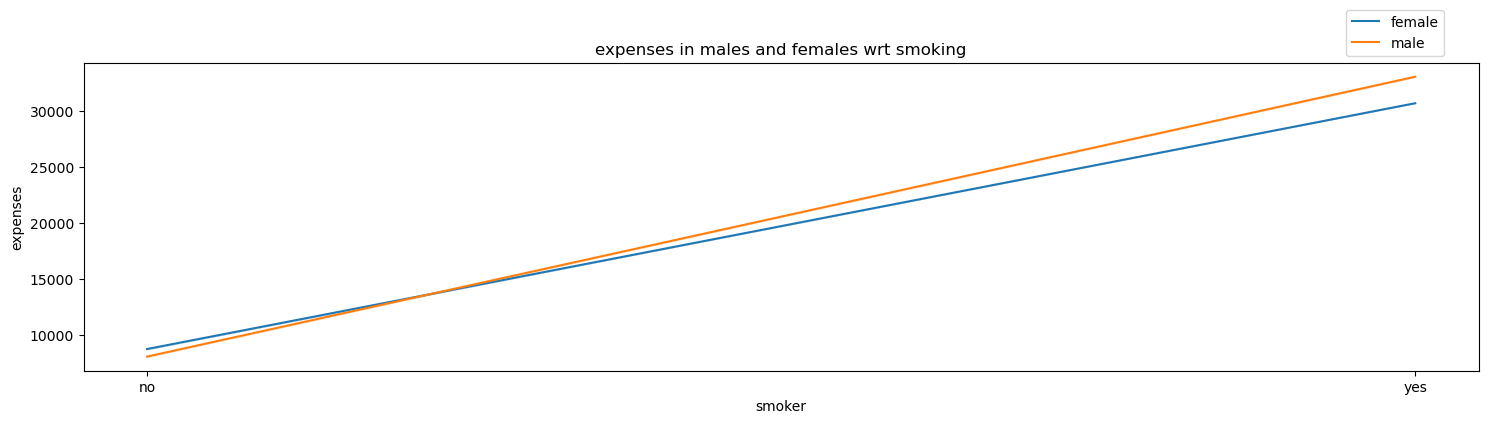

In [83]:
plt.figure(figsize=(18,4))
sns.lineplot(x = Data["smoker"], y =Data["expenses"],hue=Data["sex"],ci=0.01).set(title= 'expenses in males and females wrt smoking')
plt.legend(bbox_to_anchor=(0.9, 1))
plt.show()

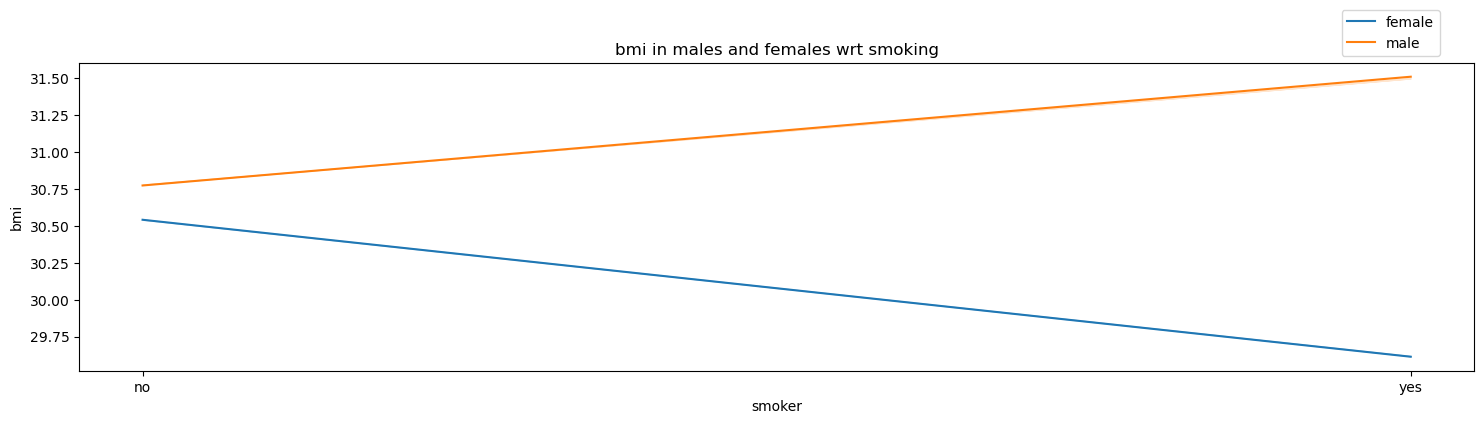

In [84]:
plt.figure(figsize=(18,4))
sns.lineplot(x = Data["smoker"], y =Data["bmi"],hue=Data["sex"],ci=0.01).set(title= 'bmi in males and females wrt smoking')
plt.legend(bbox_to_anchor=(0.9, 1))
plt.show()

In [66]:
sex_region_expenses =pd.crosstab(index=Data.sex, columns=Data.region  , values=Data.expenses, aggfunc='mean')
sex_region_expenses

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.203106,12479.870244,13499.669257,11274.411667
male,13854.005767,12354.119317,15879.617354,13412.884233


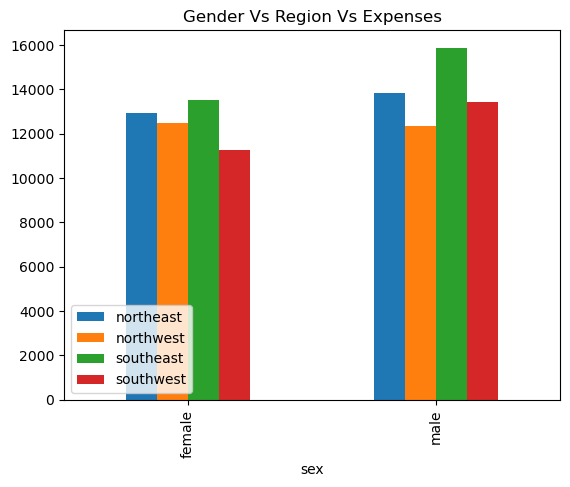

In [68]:
sex_region_expenses.plot(kind='bar',title="Gender Vs Region Vs Expenses")
plt.legend(loc='lower left')
plt.show()

In [78]:
sex_region_expenses_01 =pd.crosstab(index=Data.sex, columns=Data.region  , values=Data.expenses, aggfunc='sum')
sex_region_expenses_01

region,northeast,northwest,southeast,southwest
sex,,,,
female,2085465.70,2046698.72,2362442.12,1826454.69
male,2258202.94,1989013.21,3001247.68,2186300.13


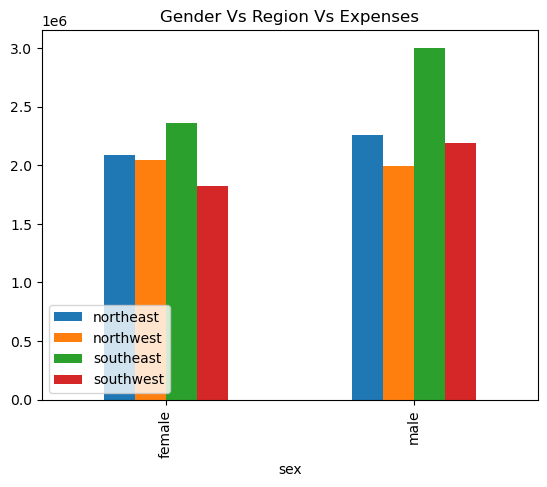

In [79]:
sex_region_expenses_01.plot(kind='bar',title="Gender Vs Region Vs Expenses")
plt.legend(loc='lower left')
plt.show()

In [74]:
sex_smoker_expenses =pd.crosstab(index=Data.sex, columns=Data.smoker  , values=Data.expenses, aggfunc='mean')
sex_smoker_expenses

smoker,no,yes
sex,,
female,8762.297367,30678.996261
male,8087.204971,33042.006226


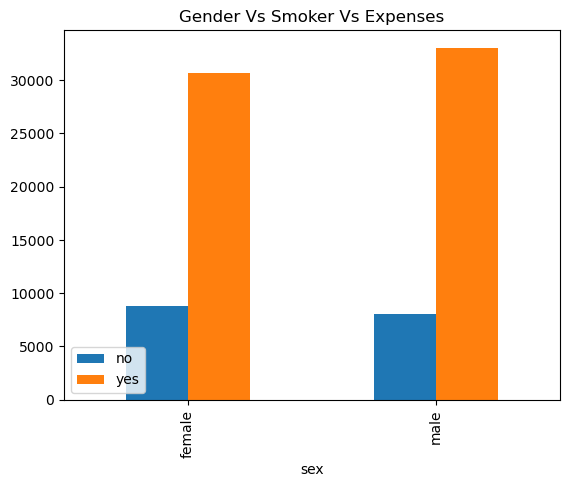

In [76]:
sex_smoker_expenses.plot(kind='bar',title="Gender Vs Smoker Vs Expenses")
plt.legend(loc='lower left')
plt.show()

In [80]:
region_smoker_expenses =pd.crosstab(index=Data.region, columns=Data.smoker  , values=Data.expenses, aggfunc='mean')
region_smoker_expenses

smoker,no,yes
region,,
northeast,9165.531946,29673.536269
northwest,8556.463558,30192.002759
southeast,8032.216300,34844.997253
southwest,8019.285019,32269.064138


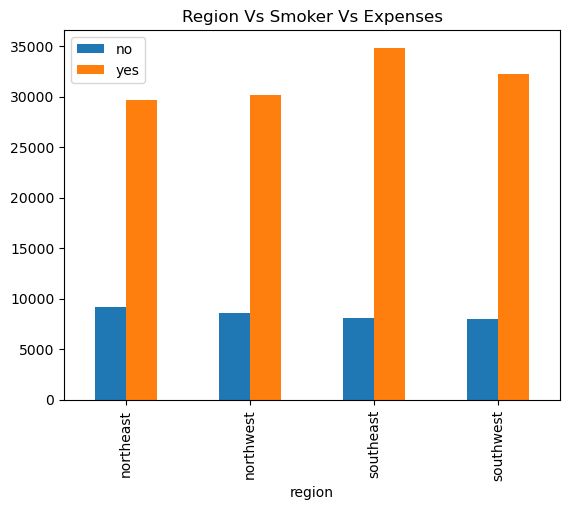

In [82]:
region_smoker_expenses.plot(kind='bar',title="Region Vs Smoker Vs Expenses")
plt.legend(loc='upper left')
plt.show()

In [92]:
Data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [93]:
category = pd.cut(Data.age,bins=[15,20,25,30,35,40,45,50,55,60,65],labels=['15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65'])
category

0       15-20
1       15-20
2       25-30
3       30-35
4       30-35
        ...  
1333    45-50
1334    15-20
1335    15-20
1336    20-25
1337    60-65
Name: age, Length: 1338, dtype: category
Categories (10, object): ['15-20' < '20-25' < '25-30' < '30-35' ... '45-50' < '50-55' < '55-60' < '60-65']

In [ ]:
Data.insert(1,'agegroup',category)

In [96]:
Data

,age,agegroup,sex,bmi,children,smoker,region,expenses
0,19,15-20,female,27.9,0,yes,southwest,16884.92
1,18,15-20,male,33.8,1,no,southeast,1725.55
2,28,25-30,male,33.0,3,no,southeast,4449.46
3,33,30-35,male,22.7,0,no,northwest,21984.47
4,32,30-35,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...,...
1333,50,45-50,male,31.0,3,no,northwest,10600.55
1334,18,15-20,female,31.9,0,no,northeast,2205.98
1335,18,15-20,female,36.9,0,no,southeast,1629.83
1336,21,20-25,female,25.8,0,no,southwest,2007.95


In [101]:
age_group = Data.groupby(Data.agegroup).expenses.sum()
age_group_1 = Data.groupby(Data.agegroup).expenses.mean()
age_group_2 = Data.groupby(Data.agegroup).expenses.max()
age_group

agegroup
15-20    1446438.14
20-25    1334188.75
25-30    1391886.32
30-35    1420817.41
35-40    1570484.93
40-45    1991795.22
45-50    2161958.90
50-55    2378320.77
55-60    2143186.88
60-65    1916747.87
Name: expenses, dtype: float64

<Axes: title={'center': 'Agebins vs sum of expenses'}, xlabel='agegroup'>

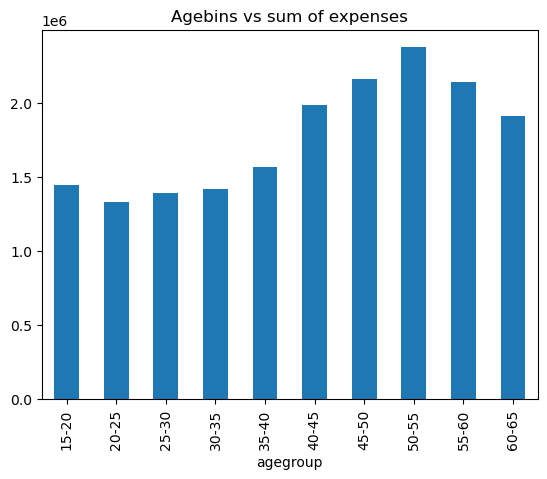

In [102]:
age_group.plot(kind='bar',title="Agebins vs sum of expenses")

<Axes: title={'center': 'Agebins vs Ang expenses'}, xlabel='agegroup'>

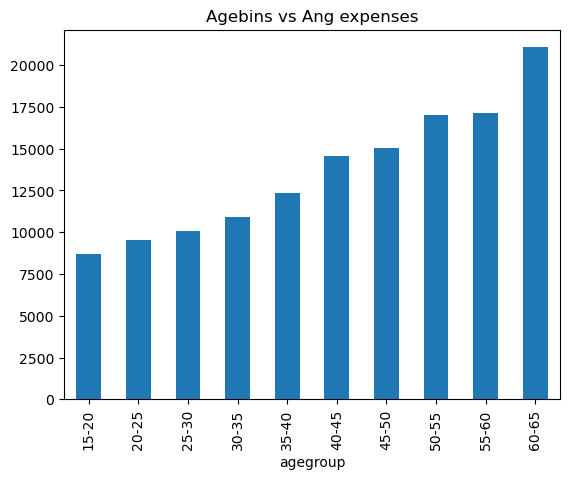

In [103]:
age_group_1.plot(kind='bar',title="Agebins vs Ang expenses")

<Axes: title={'center': 'Agebins vs Max expenses'}, xlabel='agegroup'>

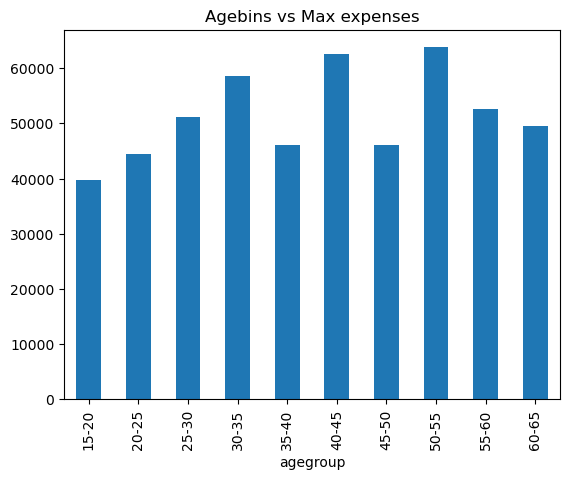

In [104]:
age_group_2.plot(kind='bar',title="Agebins vs Max expenses")

<Axes: title={'center': 'Agebins vs mean BMI'}, xlabel='agegroup'>

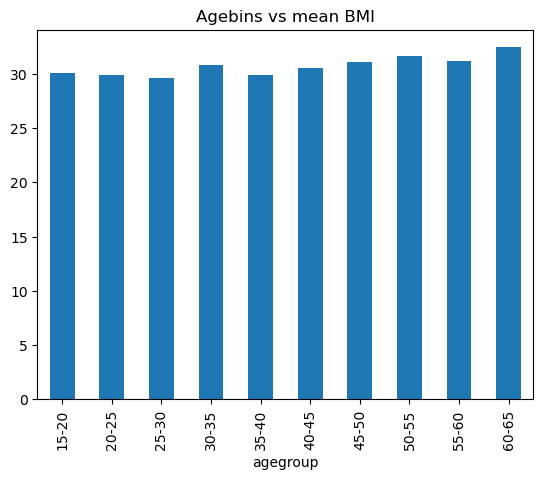

In [106]:
age_group_3 = Data.groupby(Data.agegroup).bmi.mean()
age_group_3.plot(kind='bar',title="Agebins vs mean BMI")

In [107]:
Data.groupby(['sex','region','agegroup']).expenses.mean()

sex     region     agegroup
female  northeast  15-20        4581.535294
                   20-25       10761.134118
                   25-30       10764.302941
                   30-35       12833.002500
                   35-40       11915.158000
                                   ...     
male    southwest  40-45       11692.849412
                   45-50       16436.845000
                   50-55       11564.247059
                   55-60       16944.296250
                   60-65       18462.132000
Name: expenses, Length: 80, dtype: float64

In [108]:
Data.groupby(['sex','region','agegroup']).expenses.mean().unstack()

agegroup                 15-20         20-25         25-30         30-35  \
sex    region                                                              
female northeast   4581.535294  10761.134118  10764.302941  12833.002500   
       northwest   9695.890500   8019.057059   6609.640588  16310.337333   
       southeast   9447.105417  10135.645625  10254.915556   5486.010588   
       southwest   7200.858947   8444.315294   7020.034667   7910.781875   
male   northeast  10059.649524  11000.960556   5843.737647  14954.600714   
       northwest   9846.574762   4978.186111   9750.879333   9682.958235   
       southeast   8698.234167  13927.432000  12391.806190  10209.785000   
       southwest   9214.952500   8413.442941  16711.423333  11367.575882   

agegroup                 35-40         40-45         45-50         50-55  \
sex    region                                                              
female northeast  11915.158000  12443.310625  15400.050556  17398.680556   
       northwest  10443.156667  15271.835882  11307.921765  15209.085000   
       southeast   9942.432941  18617.226111  14415.970500  21954.980000   
       southwest  12931.198750   8375.710000  14053.028824  12145.082778   
male   northeast  15125.095882  18108.126875  13729.513889  18709.580625   
       northwest   6304.701765  12334.956667  17357.117059  18363.815625   
       southeast  16289.934118  18192.908571  17222.998421  20488.415000   
       southwest  16765.710000  11692.849412  16436.845000  11564.247059   

agegroup                 55-60         60-65  
sex    region                                 
female northeast  15128.925625  20550.801818  
       northwest  16173.025625  18200.235000  
       southeast  17721.581875  20538.315833  
       southwest  13809.236667  25022.850000  
male   northeast  16458.670000  18354.514000  
       northwest  20189.957857  19818.052727  
       southeast  20910.308125  26106.707692  
       southwest  16944.296250  18462.132000

<Axes: title={'center': 'Age_Group vs Avg Expenses'}, xlabel='sex,region'>

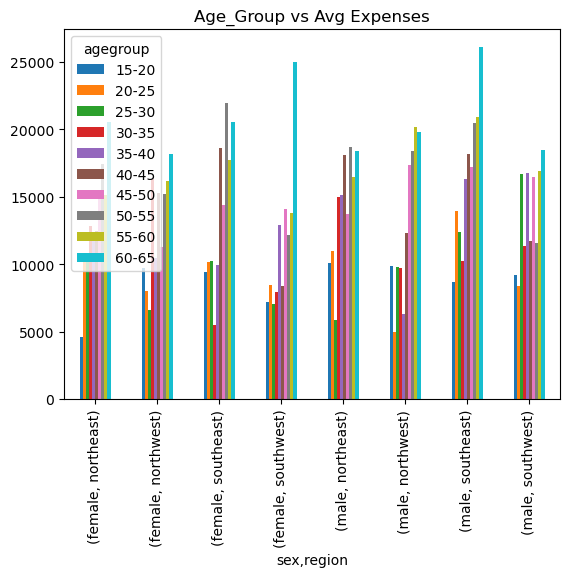

In [109]:
Data.groupby(['sex','region','agegroup']).expenses.mean().unstack().plot(kind='bar',title="Age_Group vs Avg Expenses")

<Axes: title={'center': 'Age_Group vs Avg Expenses'}, xlabel='region,sex'>

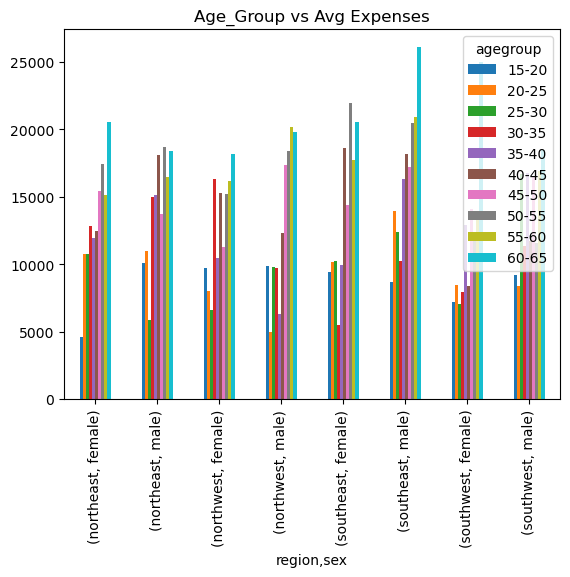

In [110]:
Data.groupby(['region','sex','agegroup']).expenses.mean().unstack().plot(kind='bar',title="Age_Group vs Avg Expenses")

<Axes: title={'center': 'Age_Group vs Avg Expenses'}, xlabel='agegroup,sex'>

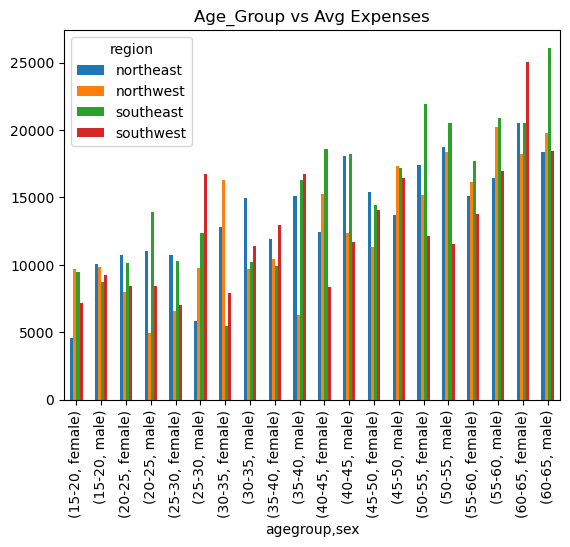

In [111]:
Data.groupby(['agegroup','sex','region']).expenses.mean().unstack().plot(kind='bar',title="Age_Group vs Avg Expenses")

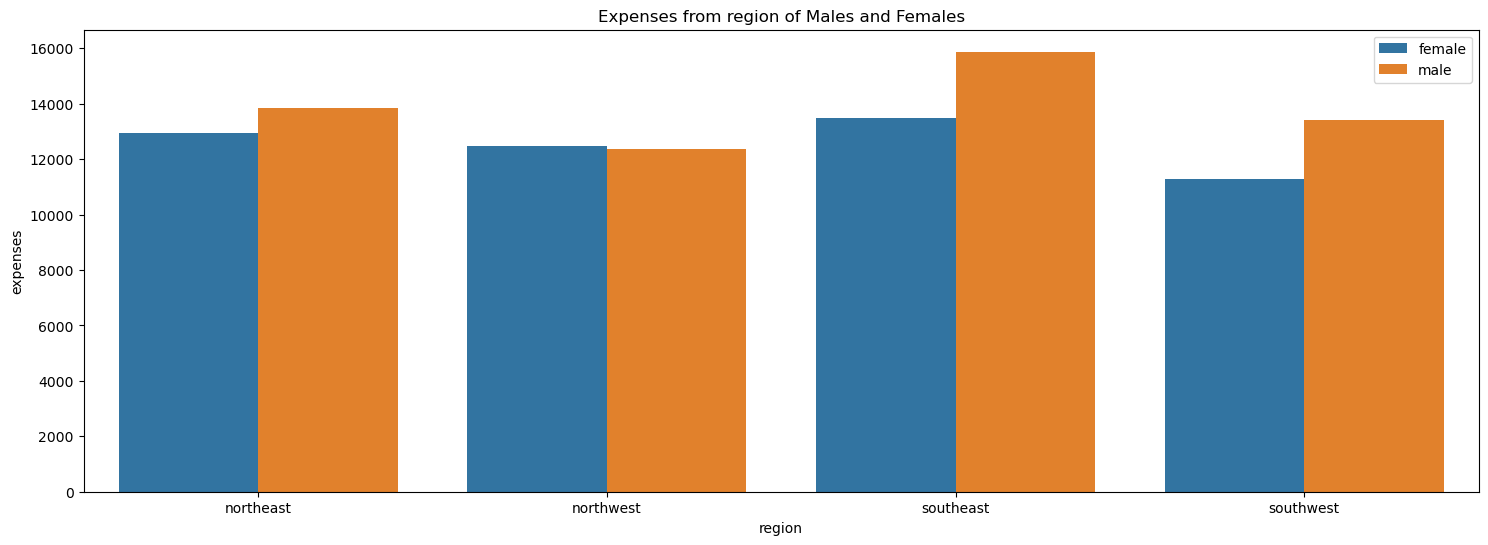

In [112]:
plt.figure(figsize=(18,6))
sns.barplot(x=Data["region"],y=Data["expenses"],hue=Data['sex'],ci=0).set(title= 'Expenses from region of Males and Females')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

[Text(0.5, 1.0, 'Region vs Expenses vs Gender')]

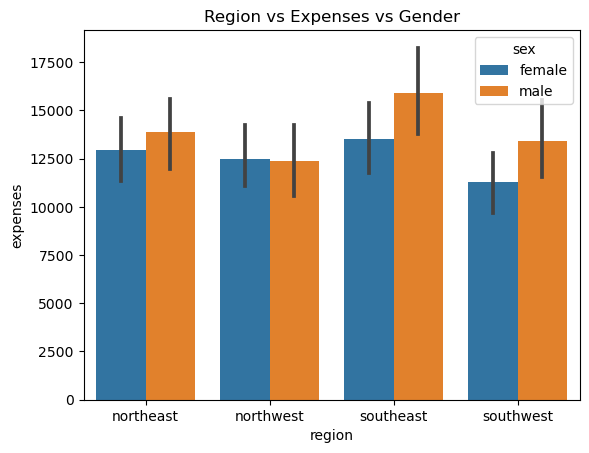

In [113]:
sns.barplot(x='region',y='expenses',hue='sex',data=Data).set(title="Region vs Expenses vs Gender" )

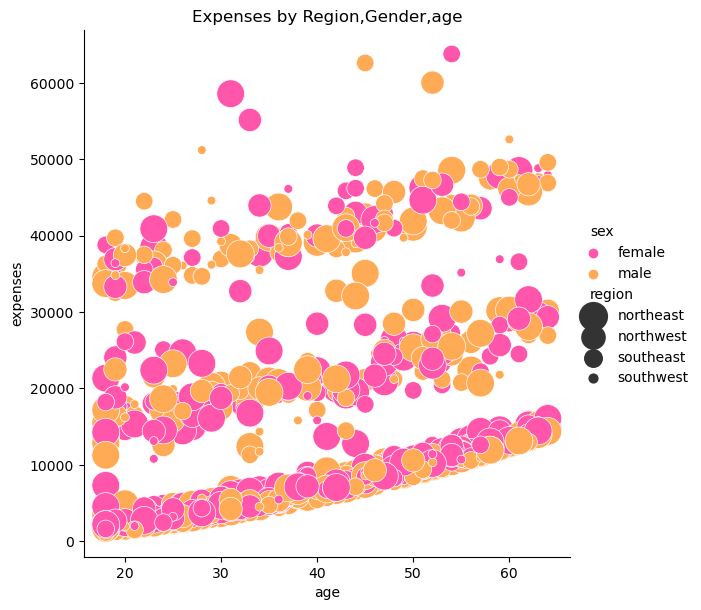

In [115]:
sns.relplot(x=Data['age'], y=Data["bmi"], hue=Data['sex'], size=  Data['region'],
            sizes=(40, 400), palette="spring",
            height=6, data=Data).set(title='bmi by Region,Gender,age');

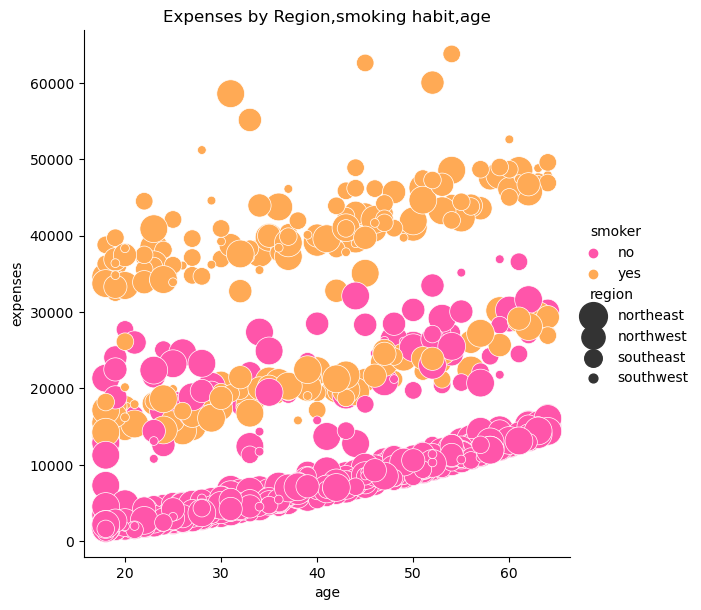

In [118]:
sns.relplot(x=Data['age'], y=Data["expenses"], hue=Data['smoker'], size=  Data['region'],
            sizes=(40, 400), palette="spring",
            height=6, data=Data).set(title='Expenses by Region,smoking habit,age');

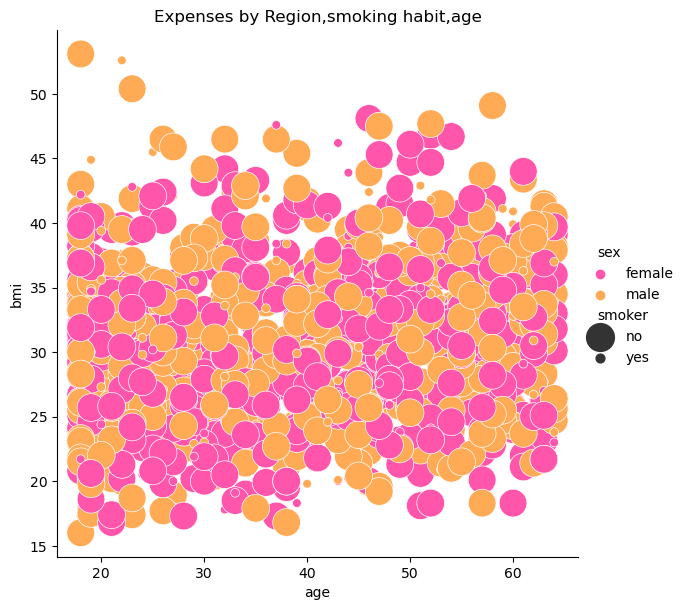

In [121]:
sns.relplot(x=Data['age'], y=Data["bmi"], hue=Data['sex'], size=  Data['smoker'],
            sizes=(40, 400), palette="spring",
            height=6, data=Data).set(title='Bmi by Age,smoking habit,Gender');